In [1]:
import numpy as np
import matplotlib.pyplot as plt
sns.set()

load data

In [2]:
from load_data import *

X_data, y_data = load_data()

loading spin 000 90 incl images....
loading spin 001 90 incl images....
loading spin 002 90 incl images....
loading spin 003 90 incl images....
loading spin 004 90 incl images....
loading spin 005 90 incl images....
loading spin 006 90 incl images....
loading spin 007 90 incl images....
loading spin 008 90 incl images....
loading spin 009 90 incl images....
loading spin 010 90 incl images....
loading spin 011 90 incl images....
loading spin 012 90 incl images....
pmap_bs_012_014_2.png image not exist.
loading spin 013 90 incl images....
loading spin 014 90 incl images....
loading spin 015 90 incl images....
loading spin 016 90 incl images....
loading spin 017 90 incl images....
loading spin 018 90 incl images....
loading spin 019 90 incl images....
loading spin 020 90 incl images....
loading spin 021 90 incl images....
loading spin 022 90 incl images....
loading spin 023 90 incl images....
loading spin 024 90 incl images....
loading spin 025 90 incl images....
loading spin 026 90 incl 

kmeans clustering

In [5]:
from sklearn.cluster import KMeans

X = X_data.reshape([X_data.shape[0],-1])
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

Text(0, 0.5, 'incl')

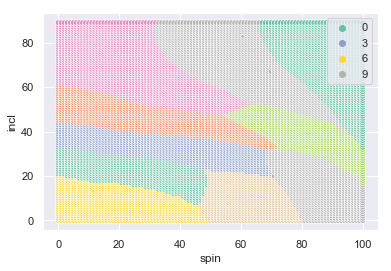

In [10]:
sns.scatterplot(y_data[:,0], y_data[:,1], hue = y, palette="Set2")
plt.xlabel('spin')
plt.ylabel('incl')

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

X = np.zeros((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
X[:,:,:,0] = X_data
y = kmeans.labels_
n_classes = len(np.unique(y))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# one hot
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# model definition
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               18874496  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [40]:
ypred = model.predict_classes(X)

Text(0.5, 1.0, 'misclassified points')

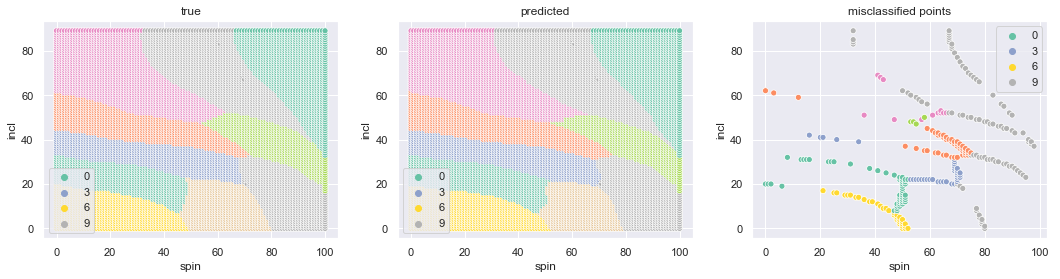

In [48]:
f, ax = plt.subplots(1, 3, figsize=(18,4))

sns.scatterplot(y_data[:,0], y_data[:,1], hue = y, palette="Set2", ax=ax[0])
ax[0].set_xlabel('spin')
ax[0].set_ylabel('incl')
ax[0].set_title('true')

sns.scatterplot(y_data[:,0], y_data[:,1], hue = ypred, palette="Set2", ax=ax[1])
ax[1].set_xlabel('spin')
ax[1].set_ylabel('incl')
ax[1].set_title('predicted')

sns.scatterplot(y_data[y!=ypred,0], y_data[y!=ypred,1], 
                hue = ypred[y!=ypred], palette="Set2", ax=ax[2])
ax[2].set_xlabel('spin')
ax[2].set_ylabel('incl')
ax[2].set_title('misclassified points')